In [20]:
# basic NOMADS OpenDAP extraction and plotting script
# from mpl_toolkits.basemap import Basemap
import numpy as np
# import matplotlib.pyplot as plt
import netCDF4
# import pygrib
%matplotlib inline
import matplotlib.pyplot as plt

# How to write the files?
# import os
# THIS_FOLDER = os.path.dirname(os.path.abspath(__file__))
# my_file = os.path.join(THIS_FOLDER, 'myfile.txt')

import urllib


In [2]:

# set up the figure
# plt.figure()

In [3]:


# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

mydate='20200203'
url='https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
time = file.variables['time'][:]
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][:,1,1]
# htsgwsfc long_name: "** surface none significant height of combined wind waves and swell [m] " 
file.close()


# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

In [4]:
data

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=9.999e+20,
            dtype=float32)

In [5]:
# Find indeces of closest grid point
# Grab all time points at that position
# Plot the timeseries

In [6]:
# Find indeces of closest grid point
def closestGridPt(buoy_lat, buoy_lon, url):
    file = netCDF4.Dataset(url)
    grid_lats  = file.variables['lat'][:]
    grid_lons  = file.variables['lon'][:]
    file.close()
    
    lat_diffs = [abs(grid_lat - buoy_lat) for grid_lat in grid_lats]
    lat_index = lat_diffs.index(min(lat_diffs))
    lon_diffs = [abs(grid_lon - buoy_lon) for grid_lon in grid_lons]
    lon_index = lon_diffs.index(min(lon_diffs))
    # Return (lon_index-1) to ensure that the returned point is WEST of the requested point
    # Without this, returning buoys on the US West Coast was sometimes returning values inland 
    # which are null
    return lat_index, (lon_index-1)
# Later may want to save ALL LOCATIONS. 
# Do feature selection to determine which data are worth keeping

buoy_lat = 37.78760
buoy_lon = 360 - 122.63260
lat_index, lon_index = closestGridPt(buoy_lat, buoy_lon, url)

In [7]:
lat_index, lon_index

(116, 189)

In [8]:
lat[lat_index], 360-lon[lon_index]

(38.0, 123.75)

In [9]:
# Grab all time points closest to the buoy

file = netCDF4.Dataset(url)
time = file.variables['time'][:]
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][:,lat_index,lon_index]
# htsgwsfc long_name: "** surface none significant height of combined wind waves and swell [m] " 
file.close()

In [10]:
data

masked_array(data=[4.12     , 3.97     , 4.15     , 4.31     , 4.36     ,
                   4.5299997, 4.5899997, 4.5099998, 4.43     , 4.44     ,
                   4.3199997, 4.       , 3.6799998, 3.48     , 3.37     ,
                   3.27     , 3.24     , 3.26     , 3.21     , 3.11     ,
                   2.99     , 2.8799999, 2.78     , 2.6799998, 2.58     ,
                   2.59     , 2.6799998, 2.69     , 2.58     , 2.4299998,
                   2.29     , 2.2      , 2.1499999, 2.18     , 2.27     ,
                   2.33     , 2.34     , 2.3      , 2.23     , 2.1399999,
                   2.11     , 2.18     , 2.33     , 2.48     , 2.6499999,
                   2.81     , 3.02     , 3.4199998, 3.9199998, 4.48     ,
                   4.87     , 4.91     , 5.06     , 5.46     , 5.15     ,
                   4.72     , 4.72     , 4.72     , 4.47     , 4.17     ,
                   3.83     ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
time

masked_array(data=[737459.   , 737459.125, 737459.25 , 737459.375,
                   737459.5  , 737459.625, 737459.75 , 737459.875,
                   737460.   , 737460.125, 737460.25 , 737460.375,
                   737460.5  , 737460.625, 737460.75 , 737460.875,
                   737461.   , 737461.125, 737461.25 , 737461.375,
                   737461.5  , 737461.625, 737461.75 , 737461.875,
                   737462.   , 737462.125, 737462.25 , 737462.375,
                   737462.5  , 737462.625, 737462.75 , 737462.875,
                   737463.   , 737463.125, 737463.25 , 737463.375,
                   737463.5  , 737463.625, 737463.75 , 737463.875,
                   737464.   , 737464.125, 737464.25 , 737464.375,
                   737464.5  , 737464.625, 737464.75 , 737464.875,
                   737465.   , 737465.125, 737465.25 , 737465.375,
                   737465.5  , 737465.625, 737465.75 , 737465.875,
                   737466.   , 737466.125, 737466.25 , 737466.

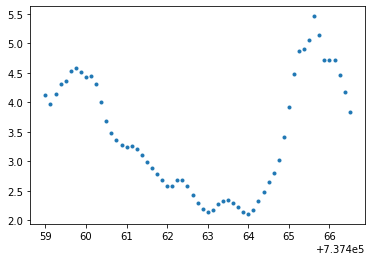

In [12]:
# Plot the timeseries
plt.plot(time, data, '.')

In [13]:
# Grab and save all data. Merge with any existing data.
# Grab all time points closest to the buoy

file = netCDF4.Dataset(url)
time = file.variables['time'][:]
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][:,:,:]
# htsgwsfc long_name: "** surface none significant height of combined wind waves and swell [m] " 
file.close()



In [45]:
save_dir = '/Users/daviderickson/projects/wavewatch/data/nomads_nww3/'
filename = save_dir + mydate + 'htsgwsfc' +'.ascii'

mydate = '20200203'
url='https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z' + '.ascii?htsgwsfc'
# savefile = open(filename, 'w')

urllib.request.urlretrieve(url, filename)

('/Users/daviderickson/projects/wavewatch/data/nomads_nww3/20200203htsgwsfc.ascii',
 <http.client.HTTPMessage at 0x11c35d810>)

In [46]:
filetype = '.grib'

save_dir = '/Users/daviderickson/projects/wavewatch/data/nomads_nww3/'
filename = save_dir + mydate + 'htsgwsfc' + filetype

mydate = '20200203'
url='https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z' + '.' + filetype + '?htsgwsfc'
# savefile = open(filename, 'w')

urllib.request.urlretrieve(url, filename)

('/Users/daviderickson/projects/wavewatch/data/nomads_nww3/20200203htsgwsfc.grib',
 <http.client.HTTPMessage at 0x11c363690>)

In [43]:
file = netCDF4.Dataset(filename)
data = file.variables['htsgwsfc'][:,1,1]
data
file.close()

OSError: [Errno -51] NetCDF: Unknown file format: b'/Users/daviderickson/projects/wavewatch/data/nomads_nww3/20200203htsgwsfc.nc'

In [17]:
data.shape

(61, 157, 288)

In [18]:
# Grab and save all data. Merge with any existing data.
# Building database to use for modeling later

# Positions close to buoys of interest. Perhaps all locations for now? 
# All files, times, variables of interest, 

In [19]:
# mydate = '20200203'
# url = ''

# 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww320200203/nww320200203_00z.ascii?htsgwsfc[0][0][0]'

In [30]:
# Can NOT grab data older than 1 week! 
mydate='20200128'
url='https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
    mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell
file = netCDF4.Dataset(url)
data = file.variables['htsgwsfc'][:,1,1]
# htsgwsfc long_name: "** surface none significant height of combined wind waves and swell [m] " 
file.close()

OSError: [Errno -70] NetCDF: DAP server error: b'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww320200128/nww320200128_00z'